# Unsupervised Learning
## Agenda
- Introduction to unsupervised learning
  - What is unsupervised learning
  - Approaches to unsupervised algorithm (Clustering, Dimensionality Reduction, Association Rule)
- Clustering Techniques
  - Overview of Culstering
  - K-Means Clustering
    - Algorithm and Implementation
    - Choosing the number of clusters
      - Elbow Method
      - Silhouette Score
  - Heirarchical Clustering
    - Agglomerative Clustering
    - Dendrograms and linkage criteria
  - DBSCAN (Density Based Spatial Clustering of Applications with Noise

## Introduction to unsupervised learning
### What is unsupervised learning
unsupervised learning is machine learning type where the model learns from unlabeled data to find patterns within it
- It deals with unlabeled data
- it enables the algorithm to work independently to discover hidden info or pattern in the data without guidance
- it classifies unsorted information according to pattern, difference or similarities

### Approaches 
There are several approaches to unsupervised learning, suited to different task

- **Clustering** - This is popular approach that groups the data points into clusters based on their simlarities. common clustering algorithms include KMeans, Kmedoids, Heirarchical clustering , DBSCAN
- **Dimensionality Reduction**  - This approach aims to reduce the number of features in a dataset while perserving essential information. Principal Component Analysis(PCA) is widely used dimensionality reduction technique
- **Association Rule Learning** -  This approach discovers relationship between different variables in a large dataset. It helps in identify items that frequently appear together. The most common algo is apriori.  (Diaper Beer Case Study)

## Clustering Techniques
Idea is to group the data points based on the similarities, aiming to discover inherent pattterns or structures within the data

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/clustering.png)


-Clustering Techniques divides a set of datapoints into multiple clusters, ensuring similarity within each cluster.its goals is to segregate datapoints with similar traits

# K Means Clustering
K-means clustering is an unsupervised machine learning algorithm that partitions data into k clusters by minimizing the within-cluster variance.- It groups unlabeled data into clusters by identifying the k number of centroids.- It assigns every data point to the closest cluster by calculating and using the pairwise Euclidean distance between points.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Unsupervised.png)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/K_means.png)

- Step 1. Select the number of clusters, k (e.g., k = 2 for demonstration).- Step 2. Select k random points as the initial centroids.- Step 3. Calculate the Euclidean distance from each data point to each centroid.- Step 4. Assign each data point to the nearest cluster centroid based on the calculated distances.- Step 5. Recalculate the centroids of each cluster as the mean of all points assigned to that cluster.
- Step 6. Reassign each data point to the nearest centroid. If no data points change their cluster assignments or a maximum number of iterations is reached, stop; otherwise, return to Step 5.

In [1]:
# Implementation of KMeans clustering model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data

df =  pd.read_csv('Mall_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Select Input Feature

X =  df[[ 'Annual Income (k$)','Spending Score (1-100)']]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


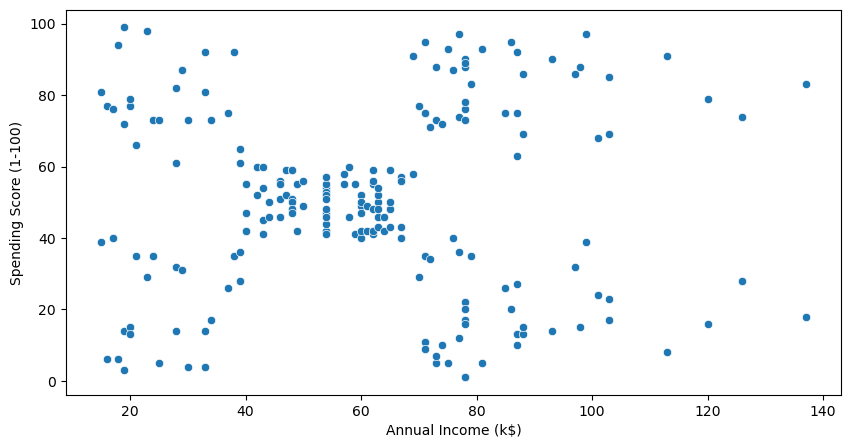

In [8]:
# Plot the scatter plot of the features
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Annual Income (k$)', y= 'Spending Score (1-100)', data = X)
plt.show()

In [9]:
from sklearn.cluster import KMeans

## Elbow Method to find Optimal number of clusters
- The elbow method involves plotting the number of clusters against the distortion or inertia to identify a significant flattening point, known as the elbow point.- The elbow point represents a trade-off between capturing meaningful patterns and avoiding excessive complexity, indicating the optimal number of clusters.- By choosing the value of k at the elbow point, you strike a balance between cluster quality and simplicity, resulting in a reasonable number of clusters.

**Steps to perform:**- Calculate the WCSS (within-cluster sum of squares) for different numbers of clusters.  - WCSS measures how compact a cluster is in k-means clustering. It calculates the total squared distance of all points within a cluster to their cluster's centroid. In simpler terms, it tells you how spread out the points are within a cluster.  - The lower the WCSS, the closer the points are to their cluster's center.- Plot the WCSS values to find the optimal number of clusters.


In [10]:
import warnings 
warnings.filterwarnings('ignore')

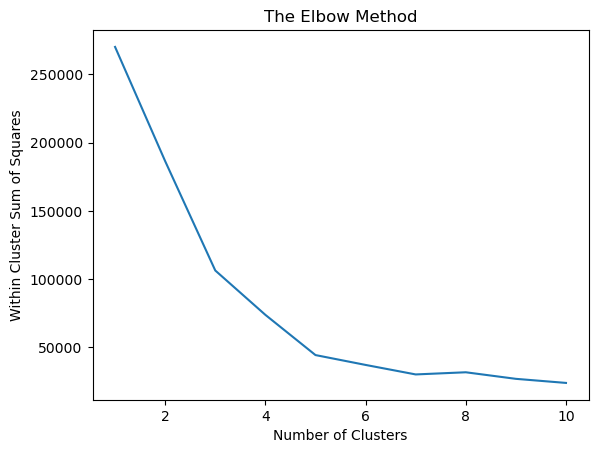

In [11]:
wcss = []
for i in range(1,11):
    model =  KMeans(n_clusters =i, random_state = 25)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

    

In [12]:
# In the plotted graph, the plot starts to to flatten at 5 clusters, hence choosing 5 as optimal number of clusters

In [13]:
model = KMeans(n_clusters = 5,random_state =25)
y_kmeans = model.fit_predict(X)


In [14]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [15]:
Xnew =  X.copy()
Xnew['y'] = y_kmeans

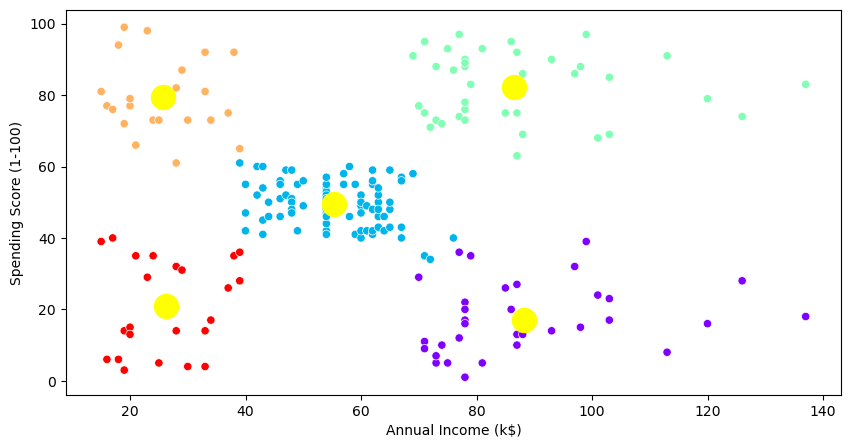

In [16]:

# Plot the scatter plot of the features
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Annual Income (k$)', y= 'Spending Score (1-100)', data = Xnew, hue = 'y', 
                palette = 'rainbow', legend = False)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s =300, c='yellow')
plt.show()

## Silhouette Score

- Silhouette score measures how well data points fit their assigned cluster by considering both similarity within a cluster and separation between clusters.
- Measures the quality of clustering by comparing how similar an object is to its own cluster versus other clusters.
     - **Intra-cluster distance** is the average distance between points within the same cluster. A lower intra-cluster distance indicates that the cluster is more compact, which is generally desirable.
     - **Inter-cluster distance** measures the distance between clusters. Ideally, you want clusters to be as far apart as possible (high inter-cluster distance) to ensure that they are distinct from one another
 
- The score ranges from -1 to 1.  - **Close to 1:** Indicates that the object is well-clustered and appropriately assigned to its cluster.  - **Close to 0:** Indicates that the object lies on or very close to the boundary between two clusters.  - **Close to -1:** Indicates that the object is poorly clustered and may have been assigned to the wrong cluster.
    **Note:**  The silhouette score is particularly useful for determining the optimal number of clusters k, in a dataset.

In [17]:
from sklearn.metrics import silhouette_score

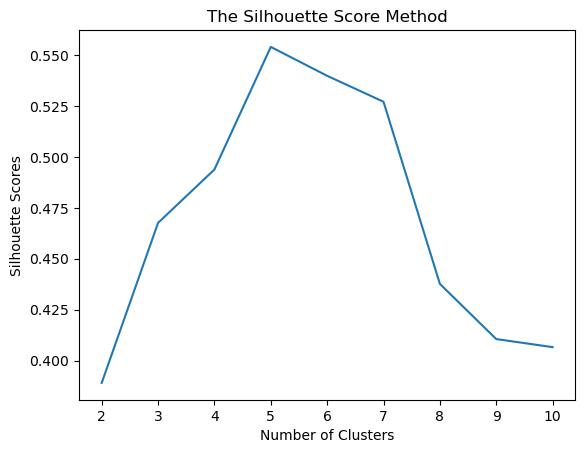

In [18]:
ss = []
for i in range(2,11):
    model =  KMeans(n_clusters =i, random_state = 25)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    ss.append(score)
plt.plot(range(2,11), ss)
plt.title('The Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()

In [19]:
optimal_clusters = range(2,11)[ss.index(max(ss))]
print(f'Optimal Number of clusters {optimal_clusters}')

Optimal Number of clusters 5


## Heirarchical Clustering
Hierarchical clustering, unlike K-Means, does not require specifying the number of clusters in advance. It builds a hierarchy of clusters based on the similarity or distance between data points, capturing complex and nested cluster shapes. This method provides a detailed view of data relationships through a dendrogram, making it more flexible for exploring the data's structure.

It adopts either of the following approaches for grouping data:
- Agglomerative Hierarchical Cluster Analysis: Bottom-to-top approach
- Divisive Hierarchical Cluster Analysis: Top-to-bottom approach

### Dendrograms and Linkage Criteria in Hierarchical Clustering Dendrograms: 
A dendrogram is a tree-like diagram that displays the relationships between similar objects. Each branch represents a category or class, and the entire diagram shows the hierarchical structure connecting all the categories or classes.

**Components of a Dendrogram**
- **Leaves (Terminal Nodes):** These represent the individual data points at the bottom of the dendrogram.
- **Branches (Internal Nodes):** These represent the clusters formed by merging or splitting. The height of the branches indicates the distance or dissimilarity between clusters.
- **Height:** The vertical axis of the dendrogram represents the distance or dissimilarity at which clusters are merged or split. A greater height indicates a higher dissimilarity.

**How to Read a Dendrogram**
- **Merging:** Starting from the leaves, data points that are close to each other are merged first, forming small clusters.
- **Splitting:** As you move up, these small clusters are further merged based on their distance or dissimilarity until all data points are combined into a single cluster at the root.
- **Cluster Formation:** By setting a threshold on the height, you can determine the number of clusters. Horizontal cuts across the dendrogram at a specific height level show the clusters formed at that dissimilarity level.

**Linkage Criteria:** It determines how the distance between clusters is calculated during the merging process. Different linkage methods can result in different clustering outcomes.

**Common Linkage Criteria**
1. **Single Linkage (Minimum Linkage):** The distance between two clusters is defined as the minimum distance between any single data point in one cluster and any single data point in the other cluster. It can lead to **chaining** effects, where clusters can form long, elongated shapes.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Single_linkage.png)

2. **Complete Linkage (Maximum Linkage):** The distance between two clusters is defined as the maximum distance between any single data point in one cluster and any single data point in the other cluster. It tends to create more compact and spherical clusters.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Complete_linkage.png)

3. **Average Linkage:** The distance between two clusters is defined as the average distance between all pairs of data points, one from each cluster. It provides a balance between single and complete linkage.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/average_linkage.png)

4. **Centroid Linkage:** The distance between two clusters is defined as the distance between the centroids (mean points) of the clusters. It can be sensitive to the shapes of the clusters.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/centroid_linkage.png)

#### __Working of Hierarchical Clustering__

Consider a dataset of n different types of animals.
- Assume that each animal is a distinct cluster by itself, that is, n clusters.
- Take the two closest data points and make them into a cluster. Now, there are n-1 clusters.
- Repeat the process as mammals are grouped into one cluster, reptiles into another, fish into a third cluster, and so on.
- Group mammals, reptiles, and fish into the vertebrate cluster and insects, corals, and arachnids into the invertebrate cluster.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/dendrogram.png)

Hierarchical clustering is the result of the of the creation of a tree-shaped structure known as a dendrogram.
- A dendrogram is a visual interpretation of the hierarchical connections between items.
- The goal is to find the best approach to assigning items to a cluster.

# Finding Optimal Numbers of clusters in Dendrogram

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Choosing_no_of_clusters.png)

To choose the number of clusters to be created:
- Identify the longest line that traverses the maximum vertical distance without intersecting any of the merging points in the dendrogram.
- Draw a horizontal line where the line can traverse the maximum vertical distance without intersecting the merging point.
- The number of vertical lines it intersects is the optimal number of clusters.

In [20]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
# Let us implement Heirarchical Clustering
X.shape

(200, 2)

In [22]:
# Reducing the input features for better visualization

df1 =  X.iloc[:51,:]

In [24]:
# Import scipy.cluster.heirarchy 

import scipy.cluster.hierarchy as shc

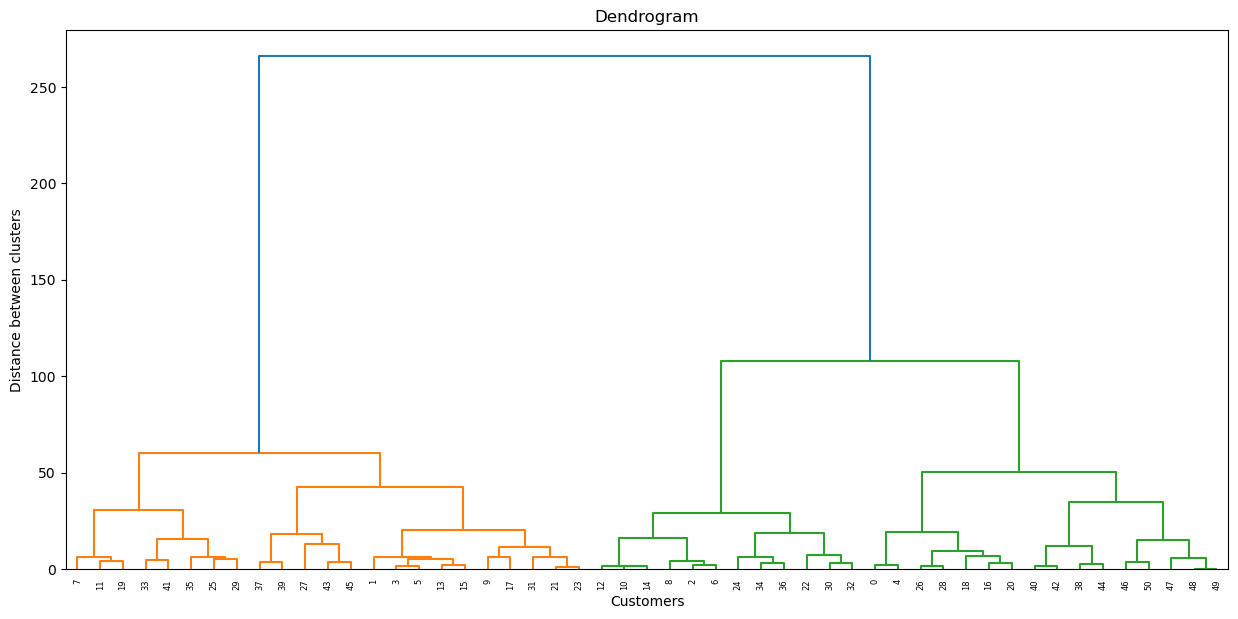

In [32]:
# Create the dendrogram

plt.figure(figsize = (15, 7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(df1, method = 'ward'))
plt.xlabel('Customers')
plt.ylabel('Distance between clusters')
plt.show()

Agglomerative hierarchical cluster analysis or the bottom-up approach, creates a more informative structure than flat clustering. This method doesn't require specifying the number of clusters beforehand. It starts with each data point as its own cluster and progressively merges pairs of clusters until all data points are combined into a single cluster.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/Agglomerative.png)

In [33]:
# Implement Agglomerative Clustering on Mall Customers data

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
# Create and fit predict the model on the data

model =  AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
labels_  =  model.fit_predict(X)

In [36]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

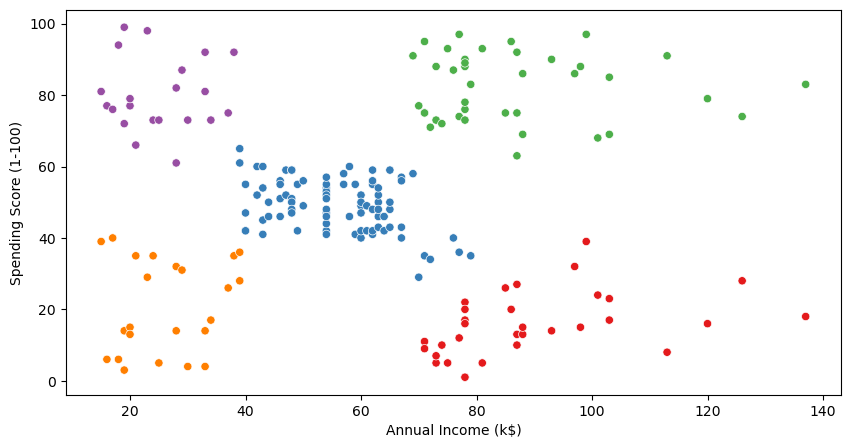

In [39]:
# Visualize the clustering done 
Xnew =  X.copy()
Xnew['y'] = labels_
# Plot the scatter plot of the features
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Annual Income (k$)', y= 'Spending Score (1-100)', data = Xnew, hue = 'y', 
                palette = 'Set1', legend = False)

plt.show()


## Divisive Heirarchical Cluster
This method, also called **top-down** clustering, begins with all data points in one large cluster. It then repeatedly splits this cluster into smaller sub-clusters based on their differences.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Divisive.png)

# DBSCAN - Density Based Spatial Clustering of Applications with Noise

DBSCAN is a popular unsupervised machine learning algorithm primarily used for clustering tasks, where the goal is to group closely packed data points based on some notion of distance. It identifies points that are alone in low-density regions as outliers or noise.

### Advantages

- It does not require specifying the number of clusters a priori, unlike K-means.
- It can find arbitrarily shaped clusters that other clustering algorithms might not find.
- It is robust to outliers; points that don’t belong to a cluster are treated as noise.

DBSCAN is widely used in various domains, such as anomaly detection, spatial data analysis, and image segmentation, due to its simplicity and effectiveness with spatial data.

DBSCAN Parameters:

  `eps (epsilon)` specifies how close points must be to each other to be considered part of a cluster. It essentially defines the neighborhood around a point.
  
  `min_samples` determines the minimum number of points required to form a dense region, which DBSCAN treats as a cluster.
  
**Note:** DBSCAN does not predict new cluster labels for unseen data because it’s not a predictive model but a fitting model. `.fit_predict()` will effectively treat your test set as a new dataset and find clusters independently of the training set, which might not align with the clusters identified in the training set.

In [82]:
## Apply DBSCAN on Mall Customers data
# Train Test Split the input features X

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

In [84]:
X_train, X_test = train_test_split(X, test_size = 0.4, random_state =  25)

In [85]:
db = DBSCAN(eps =5, min_samples = 5)
db.fit(X_train)
labels_train =  db.labels_

labels_test = db.fit_predict(X_test)

In [86]:
len(set(labels_train))

5

In [87]:
# Number of clusterin labels, ignoring noise if present

n_clusters_train = len(set(labels_train)) - (1 if -1 in labels_train else 0)
n_noise_train = list(labels_train).count(-1)

n_clusters_test = len(set(labels_test)) - (1 if -1 in labels_test else 0)
n_noise_test = list(labels_test).count(-1)

In [88]:
print(f'Estimated Numbers of clusters(train): {n_clusters_train}')
print(f'Estimated Numbers of Noise points (train): {n_noise_train}')
print(f'Estimated Numbers of clusters(test): {n_clusters_test}')
print(f'Estimated Numbers of Noise points (test): {n_noise_test}')

Estimated Numbers of clusters(train): 4
Estimated Numbers of Noise points (train): 68
Estimated Numbers of clusters(test): 1
Estimated Numbers of Noise points (test): 49


In [89]:
labels_train

array([-1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  3,
       -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0, -1,  0, -1,  0,  0, -1,  1, -1, -1, -1,  0,  2, -1, -1,  0,
       -1,  0,  0,  1,  0, -1, -1, -1, -1,  1,  0, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  0,  1,  2,  0,  0, -1,  0, -1,  0, -1, -1,  0,
       -1,  0,  2, -1,  3, -1,  0,  0,  2,  0, -1, -1, -1,  1,  3, -1, -1,
       -1, -1,  1, -1,  3,  3,  0, -1, -1,  2, -1, -1, -1,  0,  0, -1,  0,
       -1], dtype=int64)

In [90]:
newX_train = X_train.copy()
newX_train['y'] = labels_train

newX_test = X_test.copy()
newX_test['y'] = labels_test

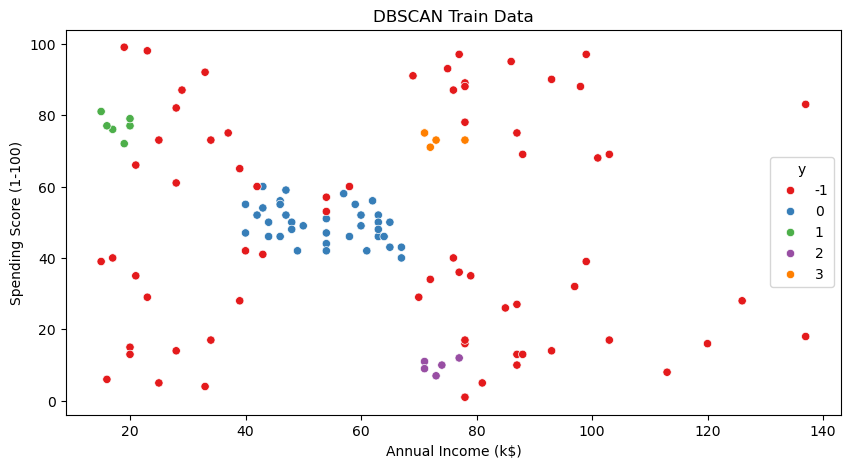

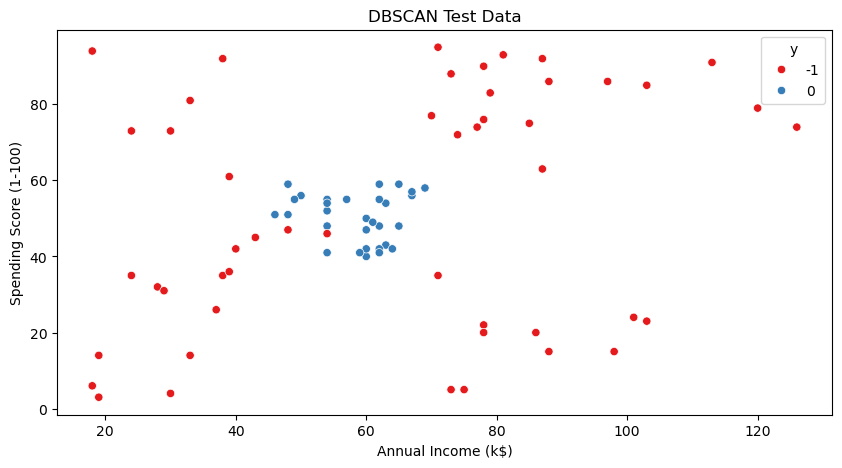

In [91]:
# Plot the scatter plot of the features (Train)
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Annual Income (k$)', y= 'Spending Score (1-100)', data = newX_train, hue = 'y', 
                palette = 'Set1', legend = True)
plt.title('DBSCAN Train Data')

plt.show()

# Plot the scatter plot of the features (Test)
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Annual Income (k$)', y= 'Spending Score (1-100)', data = newX_test, hue = 'y', 
                palette = 'Set1', legend = True)
plt.title('DBSCAN Test Data')

plt.show()